In [1]:
import cv2 as cv
import matplotlib.pyplot as plt

class VideoReader(cv.VideoCapture):
    def __init__(self, filename, _slice=slice(None, None, None)):
        self.filename = filename
        self.slice = _slice
        super().__init__(filename)
    
    # pos_msec
    # pos_frames
    # pos_avi_ratio
    # frame_width
    # frame_height
    # frame_count
    # fps
    # fourcc
    # bitrate
        
    def __setattr__(self, key, value):
        prop_name = 'CAP_PROP_'+key.upper()
        if prop_name in cv.__dict__:
            return self.set(getattr(cv, prop_name), value)
        return super().__setattr__(key, value)
    
    def __getattribute__(self, key):
        prop_name = 'CAP_PROP_'+key.upper()
        if prop_name in cv.__dict__:
            return self.get(getattr(cv, prop_name))
        return super().__getattribute__(key)
    
    def __getitem__(self, key):
        if isinstance(key, slice):
            return VideoReader(self.filename, key)
        else:
            if self.pos == self.length:
                self.open(self.filename)
            assert key in range(self.length)
            if key != self.pos:
                self.pos = key
            ret, frame = vid.read()
            return frame
        
    
    def __iter__(self):
        for i in range(self.length)[self.slice]:
            yield self[i] 

    @property
    def pos(self):
        return int(self.get(cv.CAP_PROP_POS_FRAMES))
    
    @pos.setter
    def pos(self, i):
        self.set(cv.CAP_PROP_POS_FRAMES, i)
    
    @property
    def width(self):
        return int(self.get(cv.CAP_PROP_FRAME_WIDTH))
    
    @property
    def height(self):
        return int(self.get(cv.CAP_PROP_FRAME_HEIGHT))
    
    @property
    def length(self):
        return int(self.get(cv.CAP_PROP_FRAME_COUNT))
    
    @property
    def size(self):
        return (self.width, self.height)

# vid = VideoReader('live.mpg')
vid = VideoReader('tests/videos/day5.2.mkv')

In [4]:
v2 = vid[20:30]
for i in range(v2.length)[v2.slice]:
    print(i)

20
21
22
23
24
25
26
27
28
29


In [2]:
# out = cv.VideoWriter('live.1.mp4', cv.VideoWriter_fourcc(*'MJPG'), vid.fps, vid.size)

In [3]:
count = 0
for frame in vid[20:30]:
    print(vid.pos, vid.pos_frames, vid.pos_msec)
    count += 1
#     cv.imshow('input',frame)
# #     out.write(frame)
#     key = cv.waitKey(10)
#     if key == 27:
#         break

# vid.release()
# cv.destroyAllWindows()

# out.release()
count

2674 2674.0 44550.00000000001
2675 2675.0 44567.0
2676 2676.0 44583.0
2677 2677.0 44600.0
2678 2678.0 44617.00000000001
2679 2679.0 44633.0
2680 2680.0 44650.0
2681 2681.0 44667.0
2682 2682.0 44683.0
2683 2683.0 44700.0


10

In [5]:
vid.release()
cv.destroyAllWindows()

In [8]:
vid.length

156

In [10]:
range(1,vid.length)[slice(None, None, -1)]

range(155, 0, -1)

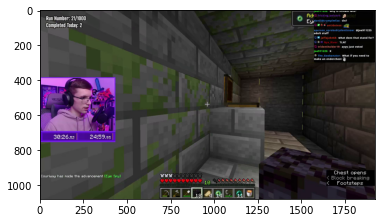

In [8]:
vid.pos_frames = 90
ret, frame = vid.read()
plt.imshow(frame[:,:,::-1])

In [21]:
vid.fps = 30

In [121]:
vid.open(vid.filename)
vid.set(cv.CAP_PROP_POS_FRAMES, 50)
vid.read()
vid.pos_avi_ratio, vid.pos_msec, vid.pos_frames

(1.1111111111111112e-05, 2017.0, 121.0)

1.1111111111111112e-05

0 165.0
0.0
1.0 2000.0
2.0 2017.0
3.0 2033.0
4.0 2050.0000000000005
5.0 2067.0
6.0 2083.0
7.0 2100.0
8.0 2117.0
9.0 2133.0
10.0 2150.0
11.0 2167.0000000000005
12.0 2183.0000000000005
13.0 2200.0
14.0 2217.0
15.0 2233.0
16.0 2250.0
17.0 2267.0
18.0 2283.0
19.0 2300.0000000000005
20.0 2317.0
21.0 2333.0
22.0 2350.0
23.0 2367.0
24.0 2383.0
25.0 2400.0
26.0 2417.0000000000005
27.0 2433.0000000000005
28.0 2450.0
29.0 2467.0
30.0 2483.0
31.0 2500.0
32.0 2517.0
33.0 2533.0
34.0 0.0
35.0 0.0
36.0 0.0
37.0 0.0
38.0 0.0
39.0 0.0
40.0 0.0
41.0 0.0
42.0 0.0
43.0 0.0
44.0 0.0


44